In [234]:
# Uses python3
import numpy as np
import xarray
import matplotlib.pyplot as plt

In [277]:
initial_z = xarray.open_dataset('linear_eos/z/Initial_state.nc', decode_times = False).mean(dim='lath')
initial_z.load()
initial_z.rename( { 'Temp':'temp', 'Salt':'salt', 'Layer':'zl', 'lonh':'xh' }, inplace=True )
linear_z = xarray.open_dataset('linear_eos/z/prog.nc', decode_times = False).mean(dim='yh')
linear_z.load()

<xarray.Dataset>
Dimensions:  (Time: 40, xh: 20, xq: 20, yq: 4, zi: 41, zl: 40)
Coordinates:
  * xq       (xq) float64 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 50.0 ...
  * zl       (zl) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * Time     (Time) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * xh       (xh) float64 2.5 7.5 12.5 17.5 22.5 27.5 32.5 37.5 42.5 47.5 ...
  * yq       (yq) float64 10.0 20.0 30.0 40.0
  * zi       (zi) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 25.0 ...
Data variables:
    u        (Time, zl, xq) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    v        (Time, zl, yq, xh) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    h        (Time, zl, xh) float64 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
    e        (Time, zi, xh) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    temp     (Time, zl, xh) float64 19.99 19.99 19.99 19.99 19.99 19.99 ...
    salt     (Time, zl, xh) float64 34.76 34.76 34.76

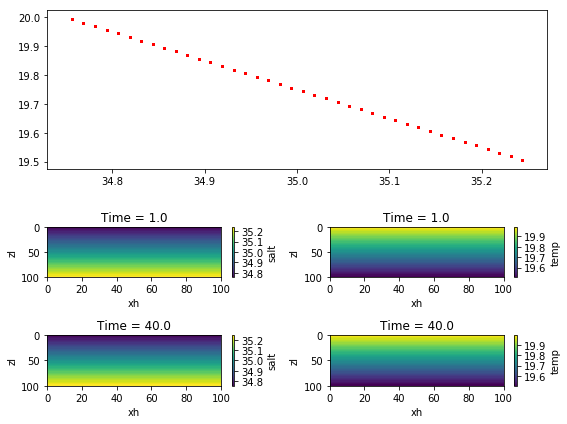

In [278]:
plt.figure(figsize=(8,6))
plt.subplot(4,2,(1,4))
plt.scatter(initial_z.salt,initial_z.temp,s=4.,c='k')
plt.scatter(linear_z.salt[-1,:,:],linear_z.temp[-1,:,:],s=4.,c='r')


idx = 5
plt.subplot(4,2,idx); idx += 1
linear_z.salt[0,:,:].plot(); plt.gca().invert_yaxis()
plt.subplot(4,2,idx); idx += 1
linear_z.temp[0,:,:].plot(); plt.gca().invert_yaxis()
plt.tight_layout()
plt.subplot(4,2,idx); idx += 1
linear_z.salt[-1,:,:].plot(); plt.gca().invert_yaxis()
plt.subplot(4,2,idx); idx += 1
linear_z.temp[-1,:,:].plot(); plt.gca().invert_yaxis()
plt.tight_layout()


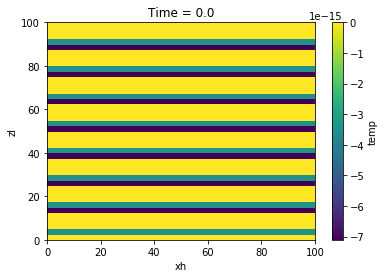

In [279]:
(initial_z.temp-linear_z.temp[-1,:,:]).plot()